In [1]:
# %curl -L -o data/archive.zip https://www.kaggle.com/api/v1/datasets/download/saldenisov/recipenlg

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np

In [ ]:
df = pd.read_csv("full_dataset.csv") # read in recipesdata/dataset/full_dataset.csv


In [30]:
len(df)

2231142

In [4]:
dfsm = df[:50000]

In [5]:
dfsm

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
...,...,...,...,...,...,...,...
49995,49995,Caramel Frosting,"[""2 sticks butter"", ""2 c. sugar"", ""1 c. milk""]","[""Let butter melt; add sugar and brown."", ""Add...",www.cookbooks.com/Recipe-Details.aspx?id=271824,Gathered,"[""butter"", ""sugar"", ""milk""]"
49996,49996,Barbecued Chicken Wings,"[""20 to 30 chicken wings"", ""1 (28 oz.) bottle ...","[""Mix sauce, brown sugar, onion and water"", ""m...",www.cookbooks.com/Recipe-Details.aspx?id=285631,Gathered,"[""chicken"", ""barbecue sauce"", ""brown sugar"", ""..."
49997,49997,Pound Cake,"[""3 sticks butter, beaten"", ""6 eggs"", ""4 c. se...","[""Bake at 275\u00b0 for 1 1/2 hours."", ""Put to...",www.cookbooks.com/Recipe-Details.aspx?id=1020555,Gathered,"[""butter"", ""eggs"", ""flour"", ""confectioners sug..."
49998,49998,Slush,"[""1 3/4 c. sugar"", ""2 c. boiling water"", ""5 ma...","[""Combine sugar and boiling water."", ""Stir and...",www.cookbooks.com/Recipe-Details.aspx?id=599562,Gathered,"[""sugar"", ""boiling water"", ""bananas"", ""orange ..."


In [6]:
dfsm["NER"] = dfsm["NER"].apply(lambda x: eval(x))

/tmp/ipykernel_42200/2207603067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm["NER"] = dfsm["NER"].apply(lambda x: eval(x))


In [7]:
# Ensure the 'NER' column is of type object (string) and handle missing values
dfsm['NER'] = dfsm['NER'].astype(str)  # Convert all values to strings
dfsm['NER'] = dfsm['NER'].apply(eval)  # Convert string representations of lists back to lists

# Explode the 'NER' column to transform each list into multiple rows
exploded_series = dfsm['NER'].explode()

# Use vectorized string operations to clean the data
# .str.strip() removes leading/trailing whitespace
# .str.lower() converts strings to lowercase
# .dropna() removes any NaN values that may result from invalid entries
cleaned_series = exploded_series.str.strip().str.lower().dropna()

# Extract unique values and convert to a set
ings = set(cleaned_series.unique())

/tmp/ipykernel_42200/2790213498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['NER'] = dfsm['NER'].astype(str)  # Convert all values to strings
/tmp/ipykernel_42200/2790213498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['NER'] = dfsm['NER'].apply(eval)  # Convert string representations of lists back to lists


In [8]:
print(len(ings))
reuse_fact = len(dfsm) / len(ings)
reuse_fact

10028


4.98603909054647

In [9]:
ings = list(ings) 
len(ings)

10028

In [10]:
# model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v1') # this is too big
# model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
# model = SentenceTransformer('sentence-transformers/static-similarity-mrl-multilingual-v1')
# model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
# model = SentenceTransformer('OrdalieTech/Solon-embeddings-large-0.1')
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')




In [11]:
X = embeddings = model.encode(ings, batch_size=50, show_progress_bar=True)
print(X.shape)

Batches:   0%|          | 0/201 [00:00<?, ?it/s]

(10028, 768)


In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

eps=0.10, min_samples=2: clusters=0, noise=10028
eps=0.10, min_samples=3: clusters=0, noise=10028
eps=0.10, min_samples=4: clusters=0, noise=10028
eps=0.24, min_samples=2: clusters=41, noise=9946
eps=0.24, min_samples=3: clusters=0, noise=10028
eps=0.24, min_samples=4: clusters=0, noise=10028
eps=0.37, min_samples=2: clusters=129, noise=9764
eps=0.37, min_samples=3: clusters=4, noise=10014
eps=0.37, min_samples=4: clusters=0, noise=10028
eps=0.51, min_samples=2: clusters=305, noise=9385
eps=0.51, min_samples=3: clusters=23, noise=9949
eps=0.51, min_samples=4: clusters=5, noise=10007
eps=0.64, min_samples=2: clusters=528, noise=8866
eps=0.64, min_samples=3: clusters=64, noise=9794
eps=0.64, min_samples=4: clusters=17, noise=9937
eps=0.78, min_samples=2: clusters=765, noise=8205
eps=0.78, min_samples=3: clusters=156, noise=9423
eps=0.78, min_samples=4: clusters=45, noise=9767
eps=0.91, min_samples=2: clusters=1033, noise=7324
eps=0.91, min_samples=3: clusters=285, noise=8820
eps=0.91, mi

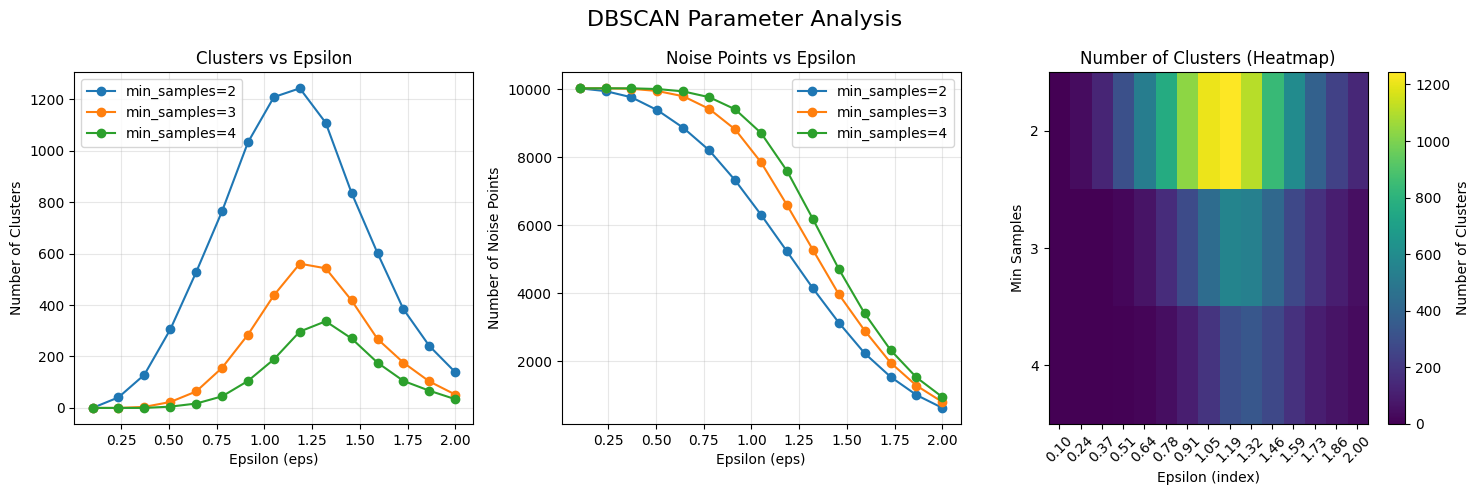


Summary Table:
Epsilon    Min Samples  Clusters   Noise     
------------------------------------------------------------
0.100      2            0          10028     
0.100      3            0          10028     
0.100      4            0          10028     
0.236      2            41         9946      
0.236      3            0          10028     
0.236      4            0          10028     
0.371      2            129        9764      
0.371      3            4          10014     
0.371      4            0          10028     
0.507      2            305        9385      
0.507      3            23         9949      
0.507      4            5          10007     
0.643      2            528        8866      
0.643      3            64         9794      
0.643      4            17         9937      
0.779      2            765        8205      
0.779      3            156        9423      
0.779      4            45         9767      
0.914      2            1033       7324      
0.9

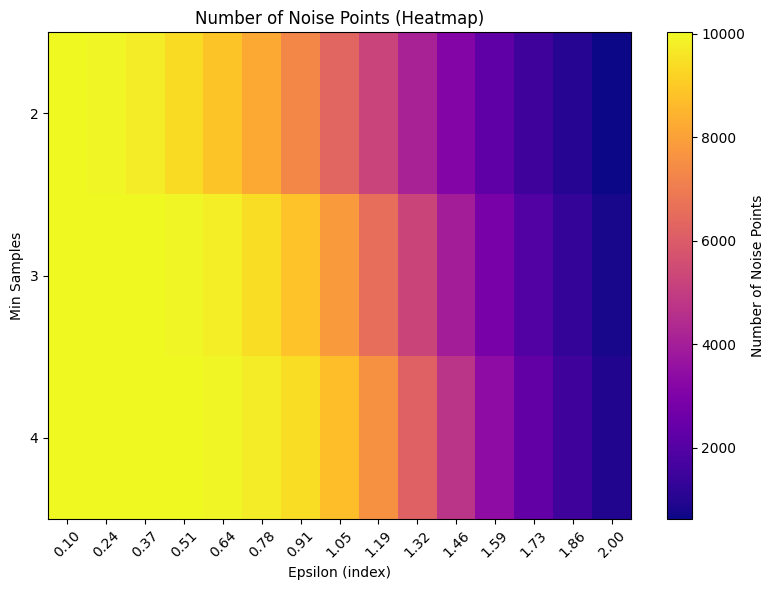

In [13]:


# Create epsilon values (10 combinations)
eps_values = np.linspace(0.1, 2.0, 15)  # Adjust range as needed for your data

# Create min_samples values
min_samples_values = [2, 3, 4]

# Store results
results = []

# Run DBSCAN for each combination
for eps, min_samples in product(eps_values, min_samples_values):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    results.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'labels': labels.copy()  # Optional: store labels if needed later
    })
    
    print(f"eps={eps:.2f}, min_samples={min_samples}: "
          f"clusters={n_clusters}, noise={n_noise}")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('DBSCAN Parameter Analysis', fontsize=16)

# Plot 1: Number of clusters vs epsilon for each min_samples
for min_samples in min_samples_values:
    subset = [r for r in results if r['min_samples'] == min_samples]
    eps_vals = [r['eps'] for r in subset]
    clusters = [r['n_clusters'] for r in subset]
    
    axes[0].plot(eps_vals, clusters, 'o-', label=f'min_samples={min_samples}')
    
axes[0].set_xlabel('Epsilon (eps)')
axes[0].set_ylabel('Number of Clusters')
axes[0].set_title('Clusters vs Epsilon')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Number of noise points vs epsilon for each min_samples
for min_samples in min_samples_values:
    subset = [r for r in results if r['min_samples'] == min_samples]
    eps_vals = [r['eps'] for r in subset]
    noise = [r['n_noise'] for r in subset]
    
    axes[1].plot(eps_vals, noise, 'o-', label=f'min_samples={min_samples}')
    
axes[1].set_xlabel('Epsilon (eps)')
axes[1].set_ylabel('Number of Noise Points')
axes[1].set_title('Noise Points vs Epsilon')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Heatmap-style visualization
# Create a grid for the heatmap
min_samples_grid = np.array(min_samples_values)
eps_grid = eps_values

# Create meshgrid for plotting
X_grid, Y_grid = np.meshgrid(eps_grid, min_samples_grid)

# Prepare data for heatmap
clusters_grid = np.zeros((len(min_samples_values), len(eps_values)))
noise_grid = np.zeros((len(min_samples_values), len(eps_values)))

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        # Find matching result
        for r in results:
            if r['min_samples'] == min_samples and np.isclose(r['eps'], eps):
                clusters_grid[i, j] = r['n_clusters']
                noise_grid[i, j] = r['n_noise']
                break

# Plot clusters heatmap
im1 = axes[2].imshow(clusters_grid, aspect='auto', cmap='viridis')
axes[2].set_xlabel('Epsilon (index)')
axes[2].set_ylabel('Min Samples')
axes[2].set_title('Number of Clusters (Heatmap)')

# Set ticks
axes[2].set_xticks(range(len(eps_values)))
axes[2].set_xticklabels([f'{eps:.2f}' for eps in eps_values], rotation=45)
axes[2].set_yticks(range(len(min_samples_values)))
axes[2].set_yticklabels(min_samples_values)

# Add colorbar for heatmap
plt.colorbar(im1, ax=axes[2], label='Number of Clusters')

plt.tight_layout()
plt.show()

# Optional: Print summary table
print("\n" + "="*60)
print("Summary Table:")
print("="*60)
print(f"{'Epsilon':<10} {'Min Samples':<12} {'Clusters':<10} {'Noise':<10}")
print("-"*60)

for r in results:
    print(f"{r['eps']:<10.3f} {r['min_samples']:<12} {r['n_clusters']:<10} {r['n_noise']:<10}")

# Optional: Create a separate figure for noise heatmap
fig2, ax2 = plt.subplots(figsize=(8, 6))
im2 = ax2.imshow(noise_grid, aspect='auto', cmap='plasma')
ax2.set_xlabel('Epsilon (index)')
ax2.set_ylabel('Min Samples')
ax2.set_title('Number of Noise Points (Heatmap)')
ax2.set_xticks(range(len(eps_values)))
ax2.set_xticklabels([f'{eps:.2f}' for eps in eps_values], rotation=45)
ax2.set_yticks(range(len(min_samples_values)))
ax2.set_yticklabels(min_samples_values)
plt.colorbar(im2, ax=ax2, label='Number of Noise Points')
plt.tight_layout()
plt.show()

In [14]:

db = DBSCAN(eps=1.2, min_samples=2).fit(X) # X is the embedding vector
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 1231
Estimated number of noise points: 5127


In [15]:
from collections import defaultdict
names = list(ings)

# Assuming `labels` is the output from DBSCAN and `names` is the list of ingredient names
# Example:
# labels = db.labels_
# names = list(ings)

# Group ingredients by their cluster labels
clusters = defaultdict(list)
for idx, label in enumerate(labels):
    clusters[label].append(names[idx])

# Print members of each cluster
for cluster_id, members in clusters.items():
    if cluster_id == -1:
        print(f"Noise Points (Unclustered): {len(members)} items")
    else:
        print(f"Cluster {cluster_id}: {len(members)} items")
    print(members)
    print("-" * 40)

# Print summary
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Cluster 0: 5 items
['pimientos', 'julienne beets', 'pimentos', 'julienne pimentos', 'pimiento']
----------------------------------------
Noise Points (Unclustered): 5127 items
['ground cardamom', 'swiss cheese singles', 'cubed cheese', 'kisses', 'lamb', 'bags spinach', 'full of milk', 'white beans', 'italian oregano', 'mint oil', 'pot cheese', 'oil of choice', 'ragu chunky', 'florida grapefruit', 'tostitos', 'hard pretzels', 'pt.vinegar', 'vegetarian red beans', 'colored tempra', 'lime sherbet ice cream', 'watchers chocolate', 'whiskers', 'ground cashews', 'wagon wheel', 'purple', 'pared apples', 'frozen white bread', 'sat', 'curry rice', 'mushroom spaghetti sauce', 'regular milk', 'coconut macaroons', 'nestles', 'white horseradish', 'philadlephia cream cheese', 'almost', 'unsalted saltines', 'unsweetened cocoa', 'junior jars apricot', 'sweet salad', 'kidney', 'cannellini beans', 'champagne mustard', 'raisin liquid', 'favorite taco', 'tiny new potatoes', 'velveeta slices', 'commercial 

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# unique_labels = set(labels)
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = labels == k

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=14,
#     )

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=6,
#     )

# plt.title(f"Estimated number of clusters: {n_clusters_}")
# plt.show()

In [17]:
def simplify_clusters(clusters):
    """
    Collapses clusters into their simplest form.
    
    Args:
        clusters (dict): A dictionary where keys are cluster IDs and values are lists of ingredient names.
    
    Returns:
        dict: A mapping from each ingredient to its simplified form.
    """
    simplified_mapping = {}

    for cluster_id, ingredients in clusters.items():
        if cluster_id == -1:
            # Noise points (unclustered ingredients) are mapped to themselves
            for curr_ing in ingredients:
                simplified_mapping[curr_ing] = curr_ing
        else:
            # Find the simplest ingredient in the cluster (fewest words)
            simplest_ingredient = min(ingredients, key=lambda x: len(x.split()))
            # Map all ingredients in the cluster to the simplest form
            for ingredient in ingredients:
                simplified_mapping[ingredient] = simplest_ingredient

    return simplified_mapping

def simplify_ingredients(ingredients, mapping):
    """
    Simplifies a list of ingredients using a given mapping.
    
    Args:
        ingredients (list): A list of ingredient names.
        mapping (dict): A dictionary mapping original ingredients to their simplified forms.
    
    Returns:
        list: A new list of simplified ingredients.
    """
    return [mapping.get(ingredient, ingredient) for ingredient in ingredients]

In [18]:
simplified_mapping = simplify_clusters(clusters)
simplified_mapping

{'pimientos': 'pimientos',
 'julienne beets': 'pimientos',
 'pimentos': 'pimientos',
 'julienne pimentos': 'pimientos',
 'pimiento': 'pimientos',
 'ground cardamom': 'ground cardamom',
 'swiss cheese singles': 'swiss cheese singles',
 'cubed cheese': 'cubed cheese',
 'kisses': 'kisses',
 'lamb': 'lamb',
 'bags spinach': 'bags spinach',
 'full of milk': 'full of milk',
 'white beans': 'white beans',
 'italian oregano': 'italian oregano',
 'mint oil': 'mint oil',
 'pot cheese': 'pot cheese',
 'oil of choice': 'oil of choice',
 'ragu chunky': 'ragu chunky',
 'florida grapefruit': 'florida grapefruit',
 'tostitos': 'tostitos',
 'hard pretzels': 'hard pretzels',
 'pt.vinegar': 'pt.vinegar',
 'vegetarian red beans': 'vegetarian red beans',
 'colored tempra': 'colored tempra',
 'lime sherbet ice cream': 'lime sherbet ice cream',
 'watchers chocolate': 'watchers chocolate',
 'whiskers': 'whiskers',
 'ground cashews': 'ground cashews',
 'wagon wheel': 'wagon wheel',
 'purple': 'purple',
 'pared

In [19]:
# for i in range(10):
#   print(dfsm["NER"][i])
#   print(simplify_ingredients(dfsm["NER"][i], simplified_mapping))
#   print("----------------")



In [20]:
# create a new column and apply
dfsm["NER_Simple"] = dfsm["NER"].apply(lambda x: simplify_ingredients(x, simplified_mapping))

/tmp/ipykernel_42200/1550908580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm["NER_Simple"] = dfsm["NER"].apply(lambda x: simplify_ingredients(x, simplified_mapping))


In [21]:
dfsm

,Unnamed: 0,title,ingredients,directions,link,source,NER,NER_Simple
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...","[brown sugar, milk, vanilla, nuts, buttered, b..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...","[beef-flavor, chicken breasts, chicken soup, s..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...","[frozen corn, creamed cheese, buttered, garlic..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...","[chicken, chicken gravy, chicken soup, shredde..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...","[peanut butter, cracker, buttered, powdered su..."
...,...,...,...,...,...,...,...,...
49995,49995,Caramel Frosting,"[""2 sticks butter"", ""2 c. sugar"", ""1 c. milk""]","[""Let butter melt; add sugar and brown."", ""Add...",www.cookbooks.com/Recipe-Details.aspx?id=271824,Gathered,"[butter, sugar, milk]","[buttered, sugar, milk]"
49996,49996,Barbecued Chicken Wings,"[""20 to 30 chicken wings"", ""1 (28 oz.) bottle ...","[""Mix sauce, brown sugar, onion and water"", ""m...",www.cookbooks.com/Recipe-Details.aspx?id=285631,Gathered,"[chicken, barbecue sauce, brown sugar, onion, ...","[chicken, barbecue sauce, brown sugar, onions,..."
49997,49997,Pound Cake,"[""3 sticks butter, beaten"", ""6 eggs"", ""4 c. se...","[""Bake at 275\u00b0 for 1 1/2 hours."", ""Put to...",www.cookbooks.com/Recipe-Details.aspx?id=1020555,Gathered,"[butter, eggs, flour, confectioners sugar, lem...","[buttered, egg, flour, confectioners sugar, le..."
49998,49998,Slush,"[""1 3/4 c. sugar"", ""2 c. boiling water"", ""5 ma...","[""Combine sugar and boiling water."", ""Stir and...",www.cookbooks.com/Recipe-Details.aspx?id=599562,Gathered,"[sugar, boiling water, bananas, orange juice, ...","[sugar, boiling water, bananas, oranges juice,..."


In [22]:
dfsm.to_csv("simplified_dataset.csv")

# Ingredient frequency sample

calculated ingredient frequency across the dataset - used for weighing

In [29]:
import json
from collections import Counter
import ast  # For safely evaluating string representations of lists

def calculate_ingredient_frequency(df, column_name='NER_Simple'):
    """
    Calculate ingredient frequency from a column containing string representations of lists
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Your recipe dataset
    column_name : str
        Name of the column containing ingredient lists (default: 'NER_Simple')
    
    Returns:
    --------
    dict: Ingredient frequency dictionary
    """
    
    ingredient_counter = Counter()
    
    # Process each row in the dataset
    for ingredients in df[column_name].dropna():
        try:
            # Convert string representation of list to actual list
            # Using ast.literal_eval for safety
            
            # If it's a list, count all ingredients
            if isinstance(ingredients, list):
                # Clean ingredients: strip whitespace and convert to lowercase
                cleaned_ingredients = [str(ing).strip().lower() for ing in ingredients]
                ingredient_counter.update(cleaned_ingredients)
            # If it's a string (single ingredient), count it
            elif isinstance(ingredients, str):
                ingredient_counter.update([ingredients.strip().lower()])
                
        except (ValueError, SyntaxError):
            # Skip if parsing fails
            print("skipping")
            continue
    
    # Convert Counter to dictionary and sort by frequency (descending)
    sorted_freq = dict(sorted(ingredient_counter.items(), key=lambda x: x[1], reverse=True))
    
    return sorted_freq

# Calculate the ingredient frequencies
ingredient_frequencies = calculate_ingredient_frequency(dfsm, 'NER_Simple')

# Save to JSON file
output_file = 'ingredient_frequencies.json'
with open(output_file, 'w') as f:
    json.dump(ingredient_frequencies, f, indent=2)

print(f"Ingredient frequencies calculated and saved to '{output_file}'")
print(f"Total unique ingredients: {len(ingredient_frequencies)}")
print("Top 10 most frequent ingredients:")
for i, (ingredient, count) in enumerate(list(ingredient_frequencies.items())[:20]):
    print(f"  {i+1}. {ingredient}: {count}")

Ingredient frequencies calculated and saved to 'ingredient_frequencies.json'
Total unique ingredients: 7025
Top 10 most frequent ingredients:
  1. saltines: 20132
  2. sugar: 17617
  3. egg: 15622
  4. flour: 12847
  5. onions: 12715
  6. buttered: 11363
  7. milk: 9997
  8. peppercorns: 7863
  9. vanilla: 7487
  10. water: 7205
  11. margarine: 5068
  12. mr.: 4699
  13. brown sugar: 4362
  14. baking powder: 3914
  15. celery: 3771
  16. chicken soup: 3657
  17. creamed cheese: 3595
  18. lemons: 3582
  19. cinnamon: 3510
  20. sourcream: 3396
